In [79]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

In [80]:
# Colors

baseline_color = (26/255, 29/255, 26/255, 1)
kong_color= (25/255, 145/255, 89/255, 1)
kong_no_auth_color = (63/255, 222/255, 148/255, 1)
istio_color= (65/255, 85/255, 153/255, 1)

In [81]:
# Function to format the labels
def thousands_separator(x, pos):
    return '{:,.0f}'.format(x)  # This adds a comma as a thousand separator

In [82]:
# Mean Response Times in milliseconds
user_levels = np.array([1, 5, 10, 50, 100])

response_times_istio = np.array([4.13, 6.96, 14.28, 91.12, 182.06])
response_times_baseline = np.array([2.11, 4.03, 13.06, 87.05, 179.11])
response_times_kong = np.array([2.16, 4.06, 14.03, 119.47, 242.02])
response_times_kong_no_auth = np.array([2.15, 4.14, 13.47, 90.06, 183.55])

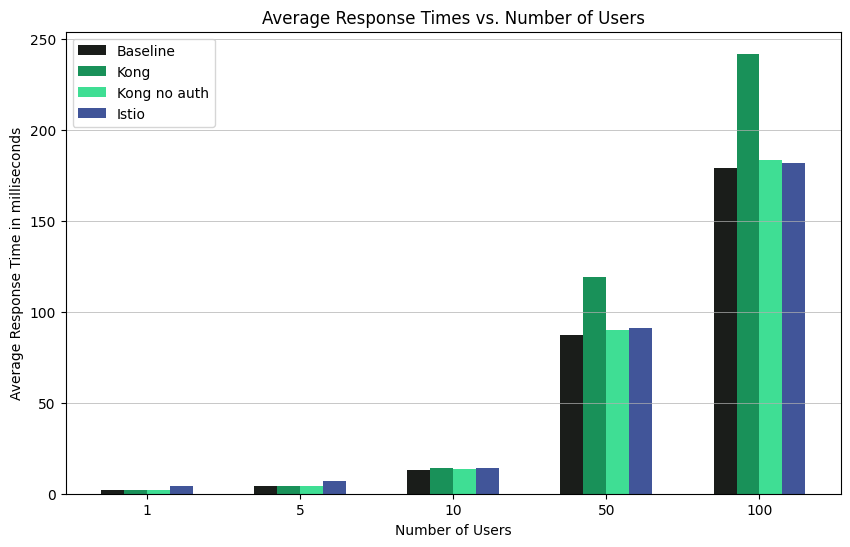

In [97]:
# Create a bar chart
plt.figure(figsize=(10, 6))
width = 0.15  # the width of the bars
x = np.arange(len(user_levels))  # the label locations

plt.bar(x - 0.5 * width, response_times_baseline, width, label='Baseline', align='center', color=baseline_color)
plt.bar(x + 0.5 * width, response_times_kong, width, label='Kong', align='center', color=kong_color)
#plt.bar(x + 1.0 * width, response_times_kong_no_auth, width, label='Kong no auth', align='center', color=kong_no_auth_color)
plt.bar(x + 1.5 * width, response_times_istio, width, label='Istio', align='center', color=istio_color)

# Adding titles and labels
plt.title('Average Response Times vs. Number of Users')
plt.xlabel('Number of Users')
plt.ylabel('Average Response Time in milliseconds')
plt.xticks([p + width/2 for p in x], user_levels)
plt.legend()

# Display and save the plot
plt.grid(True, which='both', axis='y', linestyle='-', linewidth=0.5)
plt.savefig('custom_plots/Average_response_times.png')
plt.show()

In [84]:
# Maximum Response Times in milliseconds
user_levels = np.array([1, 5, 10, 50, 100])

max_response_time_istio = np.array([80.00, 85.00, 123.00, 478.00, 1300.00])
max_response_time_baseline = np.array([63.00, 86.00, 153.00, 1305.00, 3273.00])
max_response_time_kong = np.array([68.00, 75.00, 176.00, 1892.00, 4293.00])
max_response_time_kong_no_auth = np.array([70.00, 91.00, 198.00, 810.00, 2691.00])

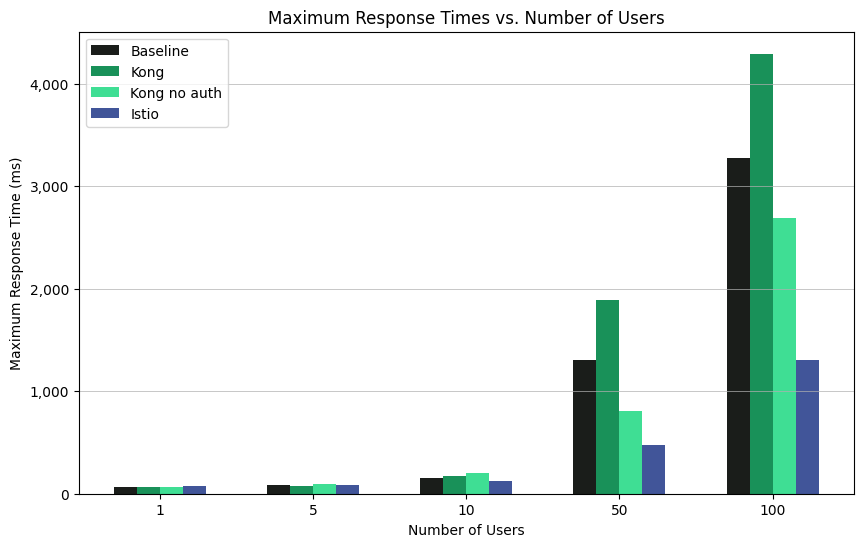

In [85]:
# Create a bar chart
plt.figure(figsize=(10, 6))
width = 0.15  # the width of the bars
x = np.arange(len(user_levels))  # the label locations

plt.bar(x - 1.0 * width, max_response_time_baseline, width, label='Baseline', align='center', color=baseline_color)
plt.bar(x - 0.0 * width, max_response_time_kong, width, label='Kong', align='center', color=kong_color)
plt.bar(x + 1.0 * width, max_response_time_kong_no_auth, width, label='Kong no auth', align='center', color=kong_no_auth_color)
plt.bar(x + 2.0 * width, max_response_time_istio, width, label='Istio', align='center', color=istio_color)


# Applying custom formatter to the y-axis
formatter = FuncFormatter(thousands_separator)
plt.gca().yaxis.set_major_formatter(formatter)

# Adding titles and labels
plt.title('Maximum Response Times vs. Number of Users')
plt.xlabel('Number of Users')
plt.ylabel('Maximum Response Time (ms)')
plt.xticks([p + width/2 for p in x], user_levels)
plt.legend()

# Display and save the plot
plt.grid(True, which='both', axis='y', linestyle='-', linewidth=0.5)
plt.savefig('custom_plots/Maximum_response_times.png')
plt.show()

In [86]:
# Number of processed requests
user_levels = np.array([1, 5, 10, 50, 100])

samples_istio = np.array([143758, 411640, 400109, 312932, 313177])
samples_baseline = np.array([282124, 708455, 437570, 327614, 318355])
samples_kong = np.array([271061, 728829, 424729, 250184, 247256])
samples_kong_no_auth = np.array([276232, 715741, 443054, 332145, 326089])

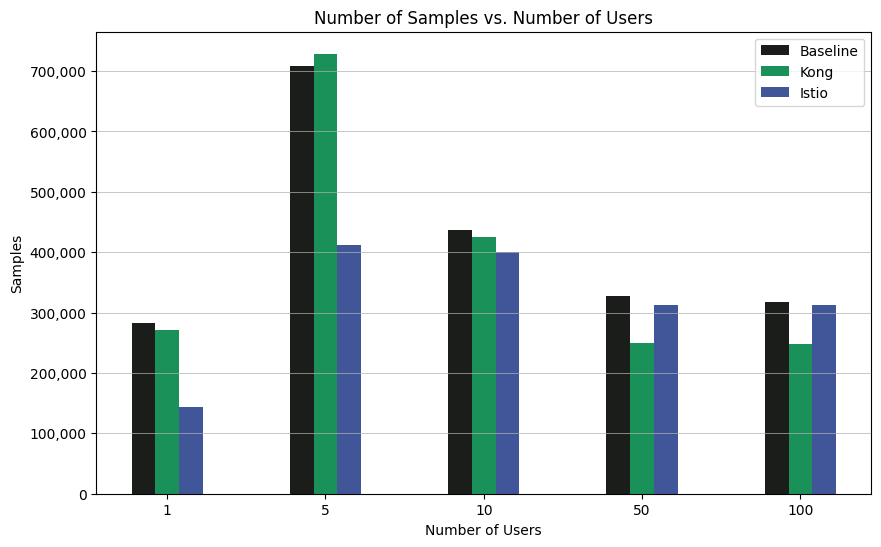

In [98]:
# Create a bar chart
plt.figure(figsize=(10, 6))
width = 0.15  # the width of the bars
x = np.arange(len(user_levels))  # the label locations

plt.bar(x - 0.5 * width, samples_baseline, width, label='Baseline', align='center', color=baseline_color)
plt.bar(x + 0.5 * width, samples_kong, width, label='Kong', align='center', color=kong_color)
#plt.bar(x + 1.0 * width, samples_kong_no_auth, width, label='Kong no auth', align='center', color=kong_no_auth_color)
plt.bar(x + 1.5 * width, samples_istio, width, label='Istio', align='center', color=istio_color)

# Applying custom formatter to the y-axis
formatter = FuncFormatter(thousands_separator)
plt.gca().yaxis.set_major_formatter(formatter)

# Adding titles and labels
plt.title('Number of Samples vs. Number of Users')
plt.xlabel('Number of Users')
plt.ylabel('Samples')
plt.xticks([p + width/2 for p in x], user_levels)
plt.legend()

# Display the plot
#plt.grid(True)
plt.grid(True, which='both', axis='y', linestyle='-', linewidth=0.5)
plt.savefig('custom_plots/Samples.png')
plt.show()

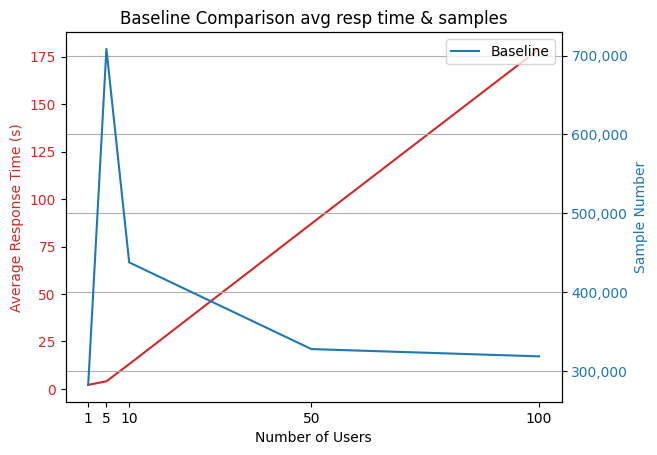

In [88]:
fig, ax1 = plt.subplots()

# Plotting the average response time on the primary y-axis
color = 'tab:red'
ax1.set_xlabel('Number of Users')
ax1.set_xticks(user_levels)
ax1.set_ylabel('Average Response Time (s)', color=color)
ax1.plot(user_levels, response_times_baseline, label='Baseline', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Sample Number', color=color)
ax2.plot(user_levels, samples_baseline, label='Baseline', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Applying custom formatter to the y-axis
formatter = FuncFormatter(thousands_separator)
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.grid(True)
plt.title('Baseline Comparison avg resp time & samples')
plt.savefig('custom_plots/Comparison_rt-s_baseline-kong.png')
plt.legend()
plt.show()

In [89]:
# jtl exploration
# read and write response times
import csv, json, os, numpy as np

RESPONSE_TIMES_FILE = "compiled_response_times.json"


if os.path.isfile(RESPONSE_TIMES_FILE) != True:
    response_times = {
    'Baseline': {
        '1': [],
        '5': [],
        '10': [],
        '50': [],
        '100': [],
    },
    'Kong': { 
        '1': [],
        '5': [],
        '10': [],
        '50': [],
        '100': [],
    },
    'Kong_no-auth': {
        '1': [],
        '5': [],
        '10': [],
        '50': [],
        '100': [],
    },
    'Istio':{
        '1': [],
        '5': [],
        '10': [],
        '50': [],
        '100': [],
    }
}
    
    # gather response times and put them into dict
    for method in ['vanilla', 'kong', 'kong_no-auth', 'istio']:
        for users in [1, 5, 10, 50, 100]:
            with open(f'{method}/result_{str(users)}_users.jtl', newline='') as csvfile:
                reader = csv.DictReader(csvfile, delimiter=',')
                line = 0
                for row in reader:
                    
                    if method == 'vanilla':
                        index = 'Baseline'
                    elif method == 'kong':
                        index = 'Kong'
                    elif method == 'kong_no-auth':
                        index = 'Kong_no-auth'
                    elif method == 'istio':
                        index = 'Istio'
                    else:
                        print("ERROR")
                        break

                    response_times[index][str(users)].append(float(row['elapsed']))
                    line += 1

    # write dict to json
    with open(RESPONSE_TIMES_FILE, "w") as file:
        json.dump(response_times, file)

In [90]:
# get percentiles

STATISTICS_FILE = "statistics.json"

response_times = {}

# read response time json
with open(RESPONSE_TIMES_FILE) as file:
    response_times = json.load(file)
    

percentiles_min_max = {
    'Baseline': {
        '1': {
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '5': {
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '10': {
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '50': {
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '100': {
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
    },
    'Kong': {
        '1': {
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '5': {
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '10': {
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '50': {
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '100': {
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
    },
    'Kong_no-auth': {
        '1': {
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '5': {
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '10': {
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '50': {
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '100': {
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
    },
    'Istio':{
        '1': {
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '5': {
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '10': {
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '50': {
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
        '100': {
            'min': float('-inf'),
            'max': float('inf'), 
            '25': 0.0, 
            '50': 0.0, 
            '75': 0.0,
        },
    }
}


if os.path.isfile(STATISTICS_FILE) != True:

    for method in percentiles_min_max:
        for users in percentiles_min_max[method]:
            numeric_data = np.array(response_times[method][users], dtype=float)
            percentiles_min_max[method][users]['min'] = np.min(numeric_data)
            percentiles_min_max[method][users]['max'] = np.max(numeric_data)
            percentiles_min_max[method][users]['25'] = np.percentile(numeric_data, 25)
            percentiles_min_max[method][users]['50'] = np.percentile(numeric_data, 50)
            percentiles_min_max[method][users]['75'] = np.percentile(numeric_data, 75)

    with open(STATISTICS_FILE, 'w') as file:
        json.dump(percentiles_min_max, file, indent=2)


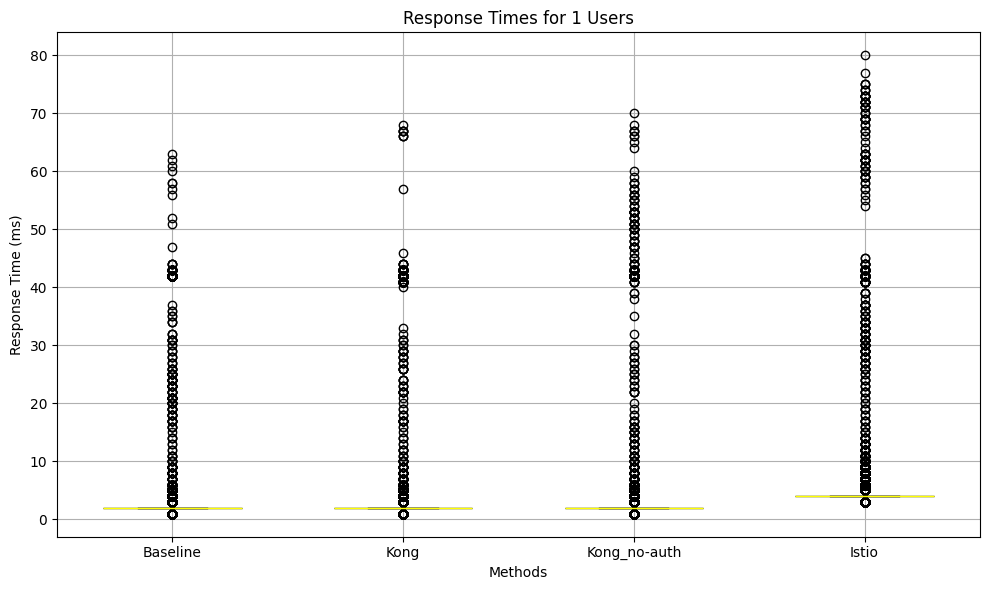

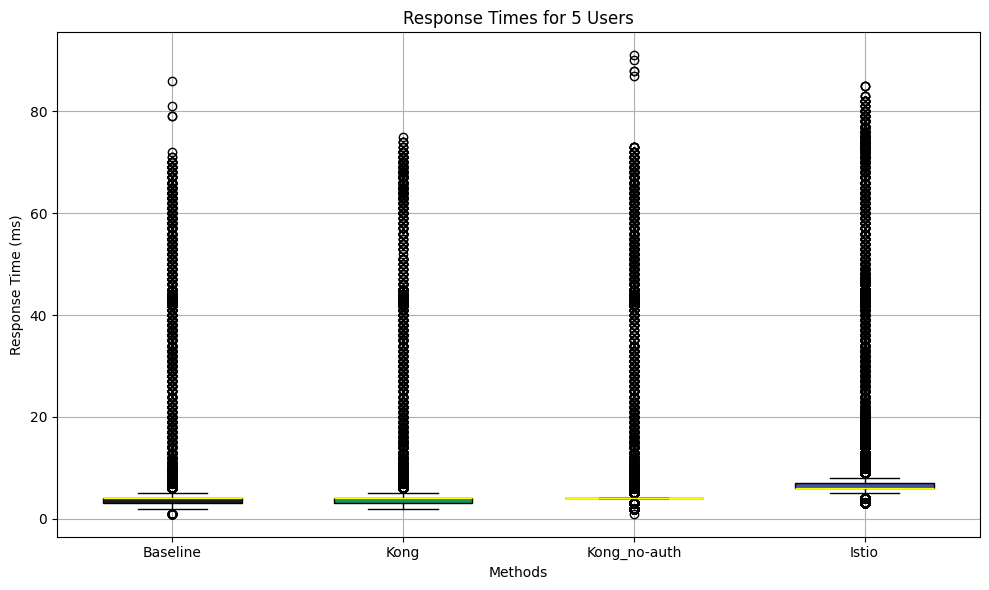

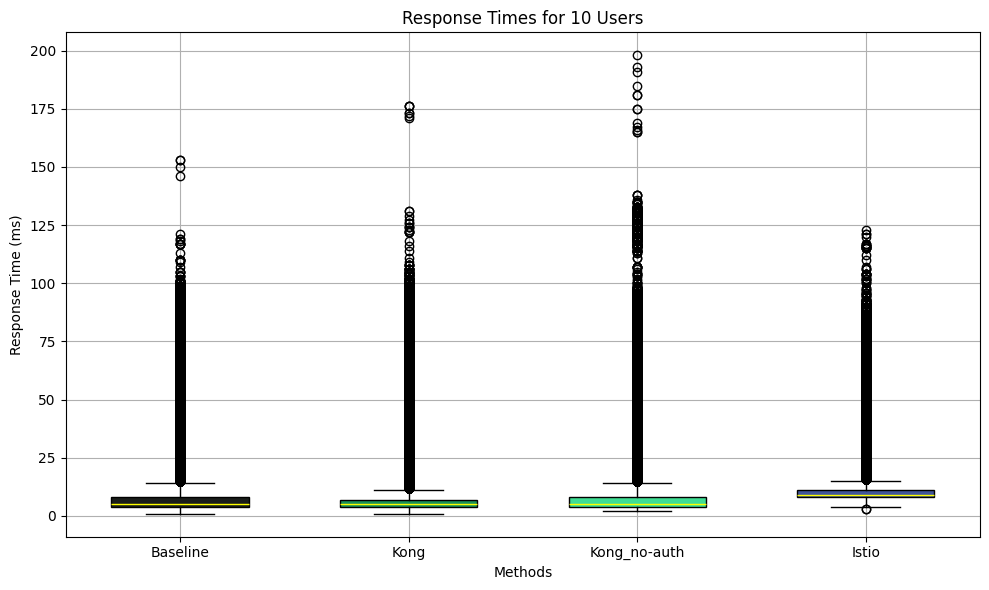

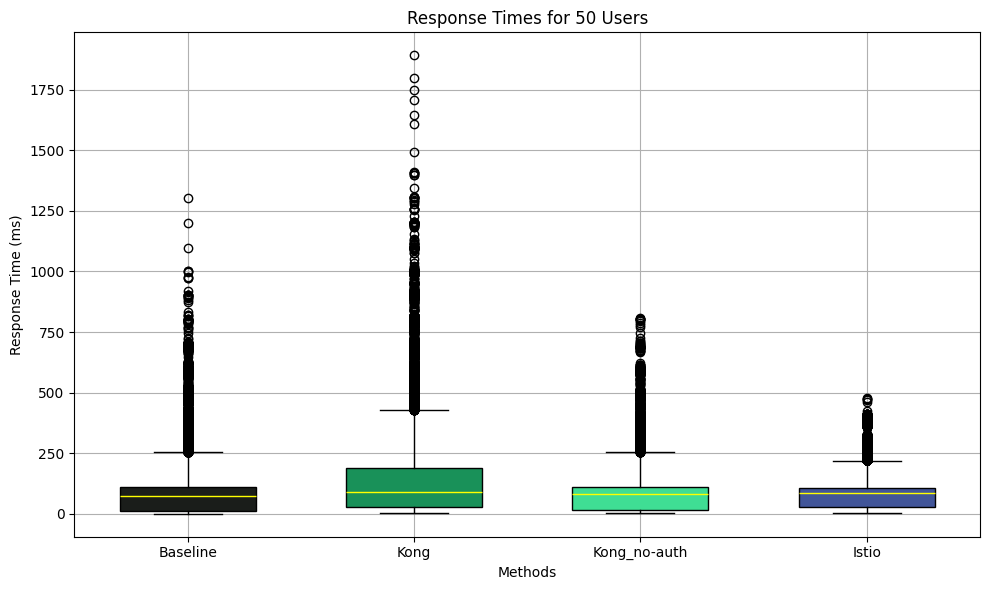

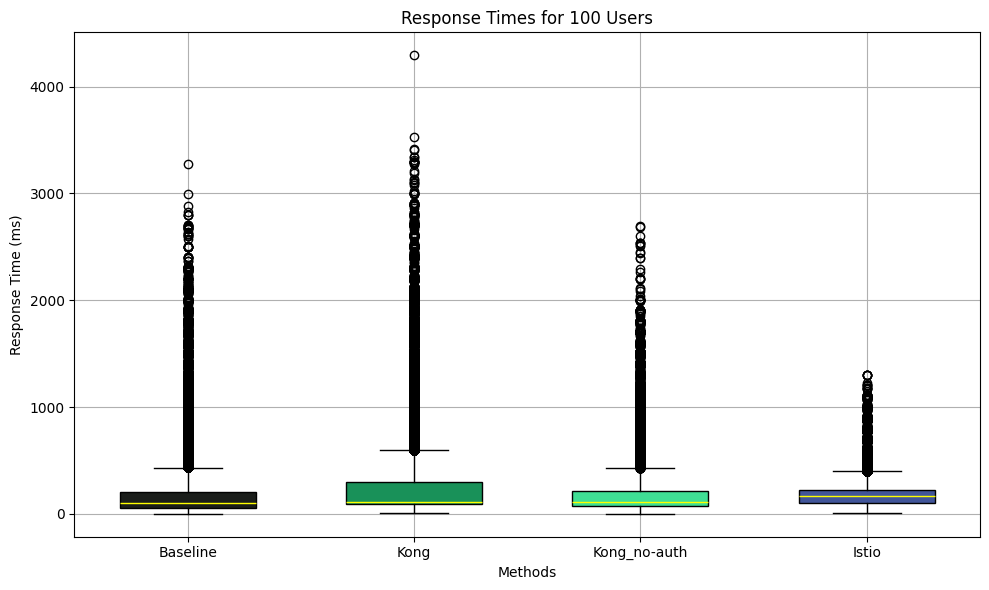

In [91]:
# User groups
user_groups = ["1", "5", "10", "50", "100"]

colors = {
    "Baseline": (26/255, 29/255, 26/255, 1),
    "Kong": (25/255, 145/255, 89/255, 1),
    "Kong_no-auth": (63/255, 222/255, 148/255, 1),
    "Istio": (65/255, 85/255, 153/255, 1)
}

# Plot for each user group
for user in user_groups:
    fig, ax = plt.subplots(figsize=(10, 6))
    methods = list(response_times.keys())
    for i, method in enumerate(methods, start=1):
        if user in response_times[method]:
            # Use the full array of response times
            ax.boxplot(response_times[method][user], positions=[i], widths=0.6, patch_artist=True,
                       boxprops=dict(facecolor=colors[method], edgecolor='black'),
                       medianprops=dict(color='yellow'))

    # Customizing the plot
    ax.set_title(f'Response Times for {user} Users')
    ax.set_xlabel('Methods')
    ax.set_ylabel('Response Time (ms)')
    ax.set_xticks(range(1, len(methods) + 1))
    ax.set_xticklabels(methods)
    ax.grid(True)

    plt.tight_layout()
    plt.show()